# Introduction to Simple Linear Regression

In this very simple example, we'll explore how to create a very simple fit line, the classic case of y=mx+b. We'll go carefully through each step, so you can see what type of question a simple fit line can answer. 

## Imports

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sample Data

This sample data is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [55]:
df = pd.read_csv("Advertising.csv")

In [56]:
df.head(50)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


**Is there a relationship between *total* advertising spend and *sales*?**

In [57]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

<Axes: xlabel='total_spend', ylabel='sales'>

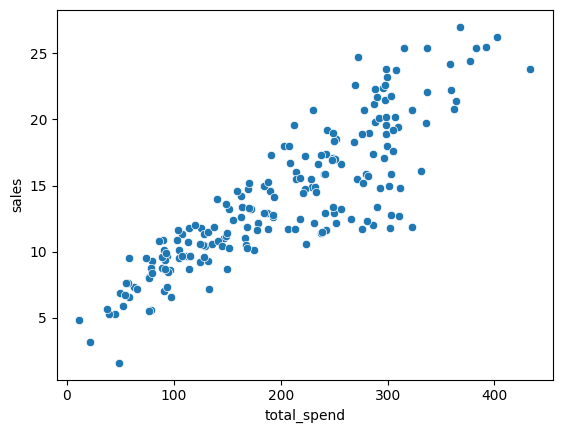

In [58]:
sns.scatterplot(x='total_spend',y='sales',data=df)

## Least Squares Line

**Understanding what a line of best fit answers.**
If someone was to spend a total of $200 , what would the expected sales be? We have simplified this quite a bit by combining all the features into "total spend", but we will come back to individual features later on. For now, let's focus on understanding what a linear regression line can help answer.

**Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?**

<Axes: xlabel='total_spend', ylabel='sales'>

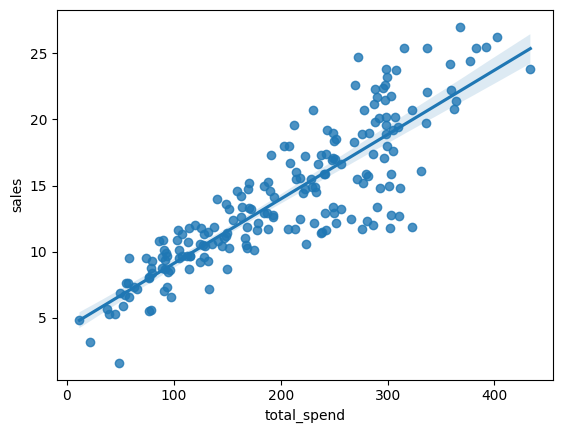

In [59]:
# Basically, we want to figure out how to create this line
sns.regplot(x='total_spend',y='sales',data=df)

Let's go ahead and start solving: $$y=mx+b$$

Simply solve for m and b, remember, that as shown in the video, we are solving in a generalized form:

$$ \hat{y} = \beta_0 + \beta_1X$$

Capitalized to signal that we are dealing with a matrix of values, we have a known matrix of labels (sales numbers) Y and a known matrix of total_spend (X). We are going to solve for the *beta* coefficients, which as we expand to more than just a single feature, will be important to build an understanding of what features have the most predictive power. We use y hat to indicate that y hat is a prediction or estimation, y would be a true label/known value.

We can use NumPy for this (if you really wanted to, you could solve this by [hand](https://towardsdatascience.com/linear-regression-by-hand-ee7fe5a751bf))

In [60]:
X = df['total_spend']
y = df['sales']

In [61]:
# Returns highest order coef first!
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

In [62]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)

In [63]:
predicted_sales =  0.04868788*potential_spend + 4.24302822

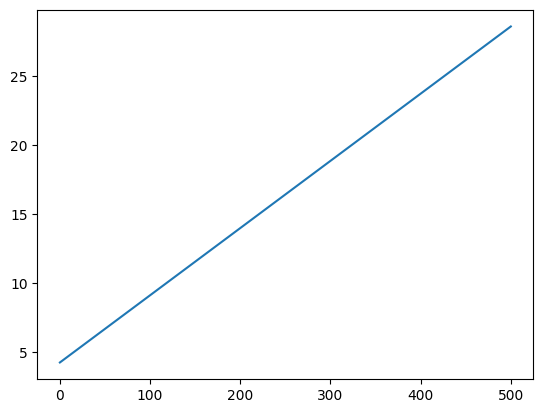

In [64]:
plt.plot(potential_spend,predicted_sales)

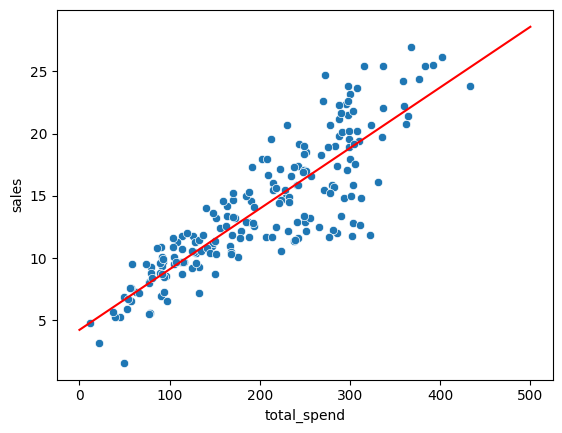

In [65]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

**Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?**

In [66]:
spend = 200
predicted_sales =  0.04868788*spend + 4.24302822

In [67]:
predicted_sales

13.98060422

# Further considerations...which we will explore in much more depth!

## Overfitting, Underfitting, and Measuring Performance

Notice we fit to order=1 , essentially a straight line, we can begin to explore higher orders, but does higher order mean an overall better fit? Is it possible to fit too much? Too little? How would we know and how do we even define a good fit?

In [68]:
np.polyfit(X,y, 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [69]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)

In [70]:
predicted_sales =   3.07615033e-07*potential_spend**3 + -1.89392449e-04*potential_spend**2 + 8.20886302e-02*potential_spend**1 + 2.70495053e+00

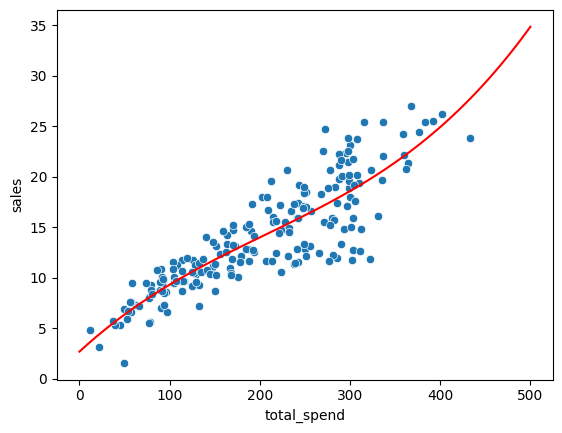

In [71]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

**Is this better than our straight line fit? What are good ways of measuring this?**